Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4253 - val_loss: 0.2577
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2443 - val_loss: 0.2027
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1974 - val_loss: 0.1802
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1781 - val_loss: 0.1708
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1699 - val_loss: 0.1647
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1646 - val_loss: 0.1607
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1607 - val_loss: 0.1576
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1574 - val_loss: 0.1542
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1542 - val_loss: 0.1516
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1517 - val_loss: 0.1488
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1493 - val_loss: 0.1463
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

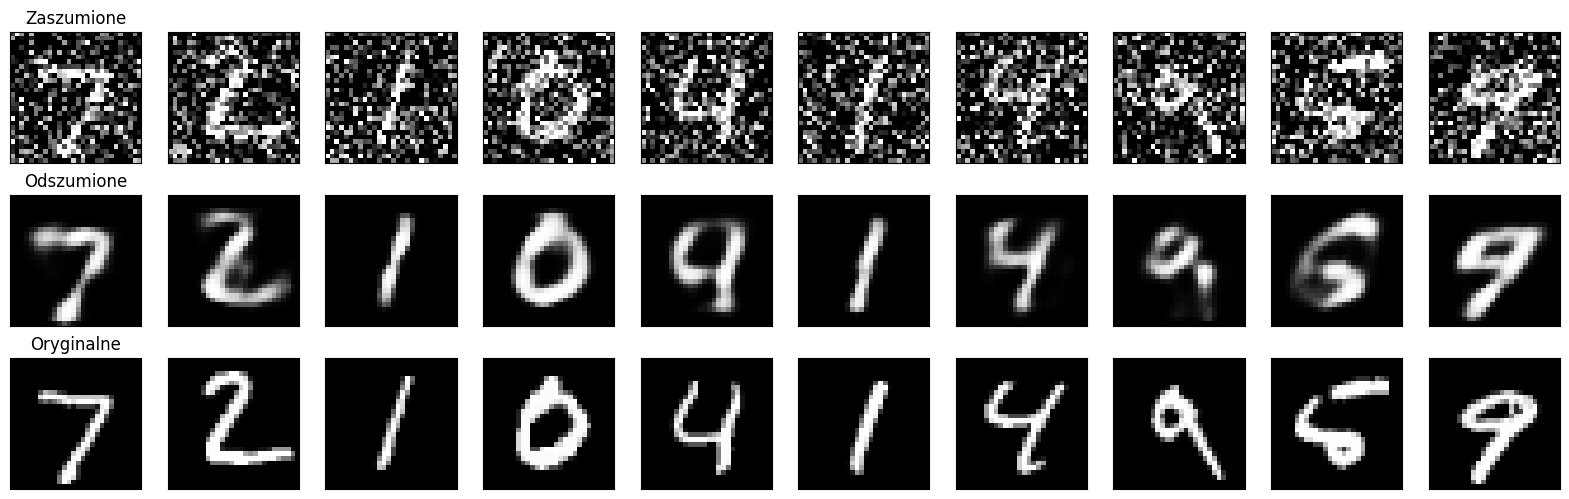

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Wczytanie zbioru MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# 2. Normalizacja (0–1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. „Spłaszczenie” obrazów 28x28 do wektora 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # (60000, 784)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 4. Dodanie szumu do danych
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# Ograniczamy wartości w przedziale [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 5. Definicja architektury autoenkodera
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)

# 6. „Odblokowanie” wyższych warstw (o ile planowałeś trenować dalsze warstwy)
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# 7. Kompilacja modelu
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# 8. Trenowanie autoenkodera na zaszumionych danych
autoencoder.fit(
    x_train_noisy,  # dane wejściowe zaszumione
    x_train,        # chcemy odtworzyć oryginalne czyste dane
    epochs=50,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)  # walidacja na zbiorze zaszumionym
)

# 9. Rekonstrukcja (odszumianie) danych testowych
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# 10. Wizualizacja
n = 10  # liczba przykładów do wyświetlenia
plt.figure(figsize=(20, 6))

for i in range(n):
    # a) Obrazek zaszumiony
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Zaszumione")

    # b) Obrazek odszumiony (rekonstrukcja)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Odszumione")

    # c) Oryginalny obrazek
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Oryginalne")

plt.show()
